# 1. Replot time evolution of kinetic energy, Fig 5 (a) in Sasaki, PPCF (2020).

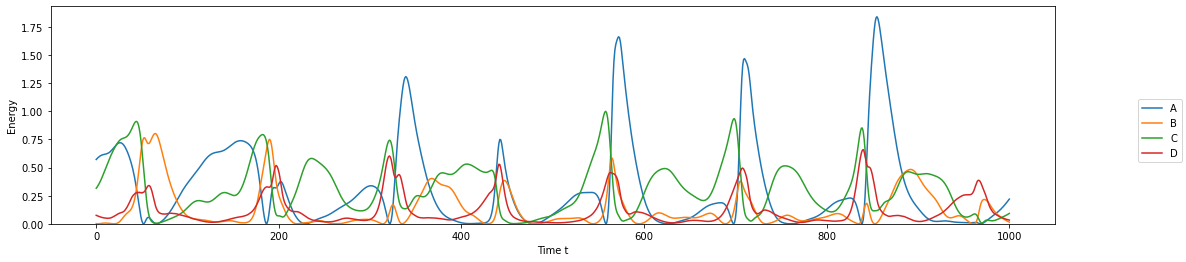

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

energy=np.loadtxt("./sample_data/Energy_evo.dat")

nodename=["A","B","C","D"]
#nodename=["Background_Flow_Shear","Zonal_Flow","Kelvin-Helmholtz_Mode","Intermittent_Spiral_Structure"]
#nodename=["BG","ZF","KH","SP"]

### Plot Energy
fig=plt.figure(figsize=[18,4])
ax = fig.add_subplot(111)
for k in range(4):
    ax.plot(energy[k,:],label=nodename[k])
ax.set_xlabel("Time t")
ax.set_ylabel("Energy")
ax.set_ylim(0,None)
fig.legend(loc="right")
plt.show()

# 2. Replot time evolution of transfer, Fig 6 (e)-(h) in Sasaki, PPCF (2020).

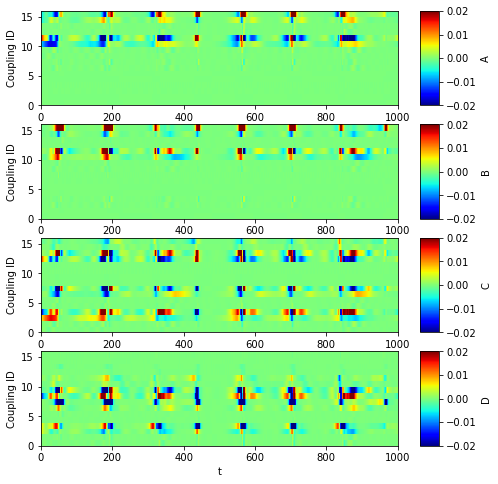

In [14]:
data_A=np.loadtxt("./sample_data/J_evo_wo_sym_A.dat")
data_B=np.loadtxt("./sample_data/J_evo_wo_sym_B.dat")
data_C=np.loadtxt("./sample_data/J_evo_wo_sym_C.dat")
data_D=np.loadtxt("./sample_data/J_evo_wo_sym_D.dat")

vmin=-0.02
vmax=0.02

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(411)
surf = ax.pcolormesh(data_A,cmap=cm.jet,vmin=vmin,vmax=vmax)
ax.set_xlabel("t")
ax.set_ylabel("Coupling ID")
cbar = fig.colorbar(surf,aspect=5)
cbar.set_label(nodename[0])

ax = fig.add_subplot(412)
surf = ax.pcolormesh(data_B,cmap=cm.jet,vmin=vmin,vmax=vmax)
ax.set_xlabel("t")
ax.set_ylabel("Coupling ID")
cbar = fig.colorbar(surf,aspect=5)
cbar.set_label(nodename[1])

ax = fig.add_subplot(413)
surf = ax.pcolormesh(data_C,cmap=cm.jet,vmin=vmin,vmax=vmax)
ax.set_xlabel("t")
ax.set_ylabel("Coupling ID")
cbar = fig.colorbar(surf,aspect=5)
cbar.set_label(nodename[2])

ax = fig.add_subplot(414)
surf = ax.pcolormesh(data_D,cmap=cm.jet,vmin=vmin,vmax=vmax)
ax.set_xlabel("t")
ax.set_ylabel("Coupling ID")
cbar = fig.colorbar(surf,aspect=5)
cbar.set_label(nodename[3])

plt.show()
#fig.savefig(file)
plt.close(fig)

# 3. Rearrange data of energy transfer, and construct non-symmetrized triad transfer $A_k^{p,q}$
Anti-symmetry $A_k^{p,q} = - A_p^{k,q}$

In [15]:
# Rearrange data
# 0: A - Background_Flow_Shear
# 1: B - Zonal_Flow
# 2: C - Kelvin-Helmholtz_Mode
# 3: D - Intermittent_Spiral_Structure
# Assymmetric triad transfer A_k^pq

a_kpq = np.array([data_A.reshape(4,4,1001),data_B.reshape(4,4,1001),data_C.reshape(4,4,1001),data_D.reshape(4,4,1001)])


energy=energy[:,120:220]   # *** Time slice ***
a_kpq=a_kpq[:,:,:,120:220] # *** Time slice ***



# for k in range(4):
#     for p in range(4):
#         for q in range(4):
#             if (k!=p):
#                 print(k,p,q,a_kpq[k,p,q,30],a_kpq[p,k,q,30],(a_kpq[k,p,q,30]+a_kpq[p,k,q,30])/max(abs(a_kpq[k,p,q,30]),abs(a_kpq[p,k,q,30])))

print(a_kpq[0,1,2,30],a_kpq[1,0,2,30], "# J(zeta|alpha,beta) = -J(alpha|zeta,beta) in Eq. (5b) in Sasaki PoP")
print(a_kpq[0,1,1,30],a_kpq[1,0,1,30], "# J(zeta|alpha,beta) = -J(alpha|zeta,beta) in Eq. (5b) in Sasaki PoP")
print(a_kpq[2,3,3,30],a_kpq[3,2,3,30], "# Combination (2,3,3) has a bit large error.")

-5.410765243335825e-05 5.302812027561579e-05 # J(zeta|alpha,beta) = -J(alpha|zeta,beta) in Eq. (5b) in Sasaki PoP
-1.4746896508618876e-06 1.454395562348013e-06 # J(zeta|alpha,beta) = -J(alpha|zeta,beta) in Eq. (5b) in Sasaki PoP
-0.0009830262880303462 0.000981419987688131 # Combination (2,3,3) has a bit large error.


# 4. Symmetrization from non-symmetrized triad transfer $A_k^{p,q}$ to the symmetrized triad transfer $S_k^{p,q}$
$S_k^{p,q}= \frac{1}{2} (A_k^{p,q} + A_k^{q,p})$  
Symmetry $S_k^{p,q} = S_k^{q,p}$  
Detailed balance $S_k^{p,q} + S_p^{q,k} S_q^{k,p} = 0$

In [16]:
from triadgraph import symmetrize_triadtransfer, directional_triadtransfer, \
                         triadgraph_symmetric_kpq, triadgraph_symmetric_all, \
                         triadgraph_directional_kpq, triadgraph_directional_all

j_kpq = symmetrize_triadtransfer(a_kpq)

print(j_kpq[0,1,2,30],j_kpq[0,2,1,30])
print(j_kpq[0,1,2,30],j_kpq[1,2,0,30],j_kpq[2,0,1,30],j_kpq[0,1,2,30]+j_kpq[1,2,0,30]+j_kpq[2,0,1,30])
print(j_kpq[2,3,3,30],j_kpq[3,2,3,30],j_kpq[3,3,2,30],j_kpq[2,3,3,30]+j_kpq[3,2,3,30]+j_kpq[3,3,2,30])

-0.00014794845191905197 -0.00014794845191905197
-0.00014794845191905197 5.2514964416708866e-05 9.534832100243207e-05 -8.516649991103663e-08
-0.0009830262880303462 0.000496750156017986 0.000496750156017986 1.047402400562573e-05


# 5. Plot the net transfer $T_k = \sum_p \sum_q S_k^{p,q}$, and replot time evolution of energy transfer, Fig. 7 (b)-(e) in Sasaki, PPCF (2020).

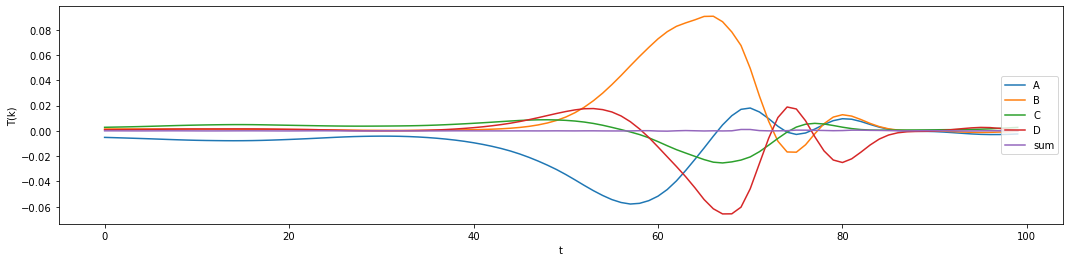

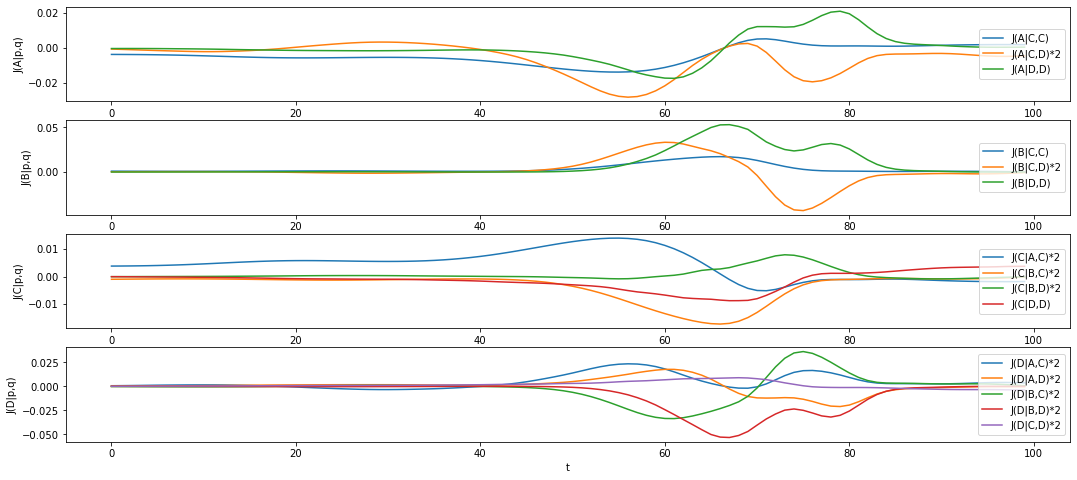

In [17]:
t_k = np.sum(np.sum(j_kpq,axis=2),axis=1)

### Plot all T_k
fig=plt.figure(figsize=[18,4])
ax = fig.add_subplot(111)
for k in range(4):
    ax.plot(t_k[k,:],label=nodename[k])
ax.plot(np.sum(t_k,axis=0),label="sum")
ax.set_xlabel("t")
ax.set_ylabel("T(k)")
ax.legend(loc="right")
plt.show()

### Plot J_k^p,q for each k
fig = plt.figure(figsize=[18,8])
screening = 0.1 * np.max(abs(j_kpq))
for k in range(4):
    ax = fig.add_subplot(410+(k+1))
    for p in range(4):
        for q in range(p,4):
            if (p!=q): # J_k^kq = J_k^qk,  J_k^pk = J_k^kp
                if np.max(abs(j_kpq[k,p,q,:])*2) > screening: # Screening for visibility
                    ax.plot(j_kpq[k,p,q,:]*2,label="J({}|{},{})*2".format(nodename[k],nodename[p],nodename[q]))
            else: # J_k^pq
                if np.max(abs(j_kpq[k,p,q,:])) > screening: # Screening for visibility
                    ax.plot(j_kpq[k,p,q,:],label="J({}|{},{})".format(nodename[k],nodename[p],nodename[q]))
    ax.set_xlabel("t")
    ax.set_ylabel("J({}|p,q)".format(nodename[k]))
    ax.legend(loc="right")
plt.show()

plt.close(fig)

# 6. Directional representation $D_{k \leftarrow q}^p$ constructed from the symmetrized triad transfer $S_k^{p,q}$

In [18]:
d_kpq=directional_triadtransfer(j_kpq)
print(j_kpq[0,1,2,10],j_kpq[1,2,0,10],j_kpq[2,0,1,10],j_kpq[0,1,2,10]+j_kpq[1,2,0,10]+j_kpq[2,0,1,10])
print(d_kpq[0,1,2,10],d_kpq[2,1,0,10])
print(d_kpq[1,2,0,10],d_kpq[0,2,1,10])
print(d_kpq[2,0,1,10],d_kpq[1,0,2,10])

print(j_kpq[0,2,2,10],j_kpq[2,2,0,10],j_kpq[2,0,2,10],j_kpq[0,2,2,10]+j_kpq[2,2,0,10]+j_kpq[2,0,2,10])
print(d_kpq[0,2,2,10],d_kpq[2,2,0,10])
print(d_kpq[2,2,0,10],d_kpq[0,2,2,10])
print(d_kpq[2,0,2,10],d_kpq[2,0,2,10])

print(np.sum(np.sum(a_kpq[:,:,:,10],axis=2),axis=1))
print(np.sum(np.sum(j_kpq[:,:,:,10],axis=2),axis=1))
print(np.sum(np.sum(d_kpq[:,:,:,10],axis=2),axis=1))

0.00010323560006146281 -9.634041440928606e-06 -9.35740503931437e-05 2.7508227390502134e-08
0.0001871481007862874 -0.0001871481007862874
-1.9268082881857213e-05 1.9268082881857213e-05
0.0 0.0
-0.004599785485128607 0.0022986179224710017 0.0022986179224710017 -2.5496401866035093e-06
-0.004597235844942003 0.004597235844942003
0.004597235844942003 -0.004597235844942003
0.0 0.0
[-0.00748503  0.00141304  0.00456177  0.00148499]
[-0.00748503  0.00141304  0.00456177  0.00148499]
[-0.00744794  0.00141577  0.00456174  0.00147042]


# 7. Network visualization
Since the relative amplitude of energy transfer is expressed by the width of arrows, normalization is recommended before the plot.

In [19]:
# Normalization for plot
#a_kpq_max = np.max(abs(a_kpq))
j_kpq_max = np.max(abs(j_kpq))
#d_kpq_max = np.max(abs(d_kpq))
a_kpq = a_kpq / j_kpq_max
j_kpq = j_kpq / j_kpq_max
d_kpq = d_kpq / j_kpq_max
energy_max = np.max(abs(energy))
energy = energy / energy_max

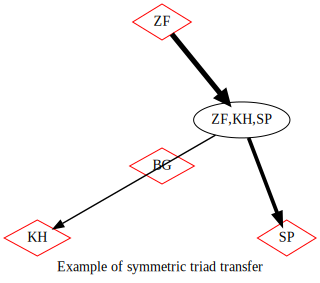

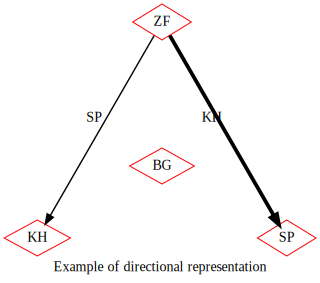

In [20]:
# Rename node name
#nodename=["A","B","C","D"]
#nodename=["Background_Flow_Shear","Zonal_Flow","Kelvin-Helmholtz_Mode","Intermittent_Spiral_Structure"]
nodename=["BG","ZF","KH","SP"]

triadgraph_symmetric_kpq(j_kpq[:,:,:,72],1,2,3,title="Example of symmetric triad transfer",pwidth=10,nodename=nodename)
triadgraph_directional_kpq(d_kpq[:,:,:,72],1,2,3,title="Example of directional representation",pwidth=10,nodename=nodename)

## 7.1 Visualization of symmetrized triad transfer $S_k^{p,q}$

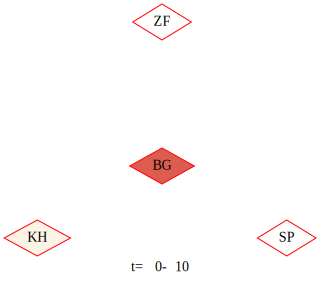

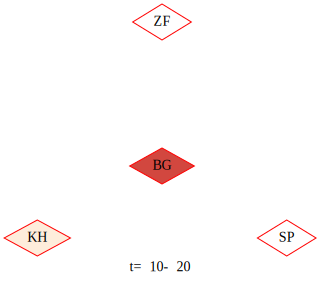

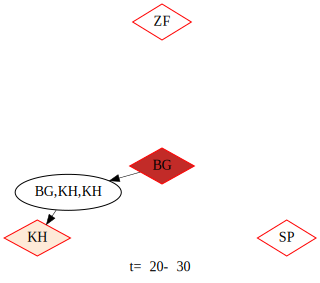

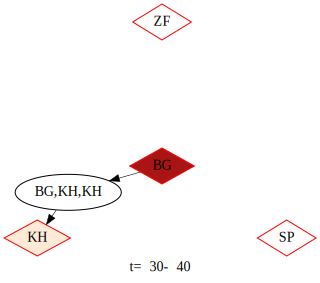

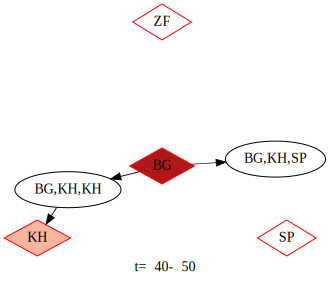

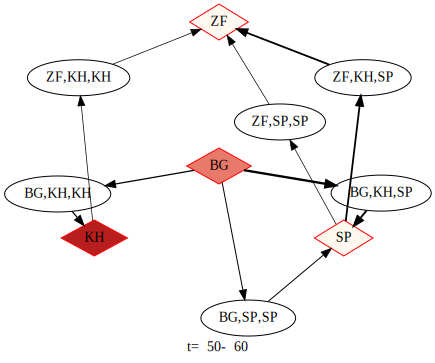

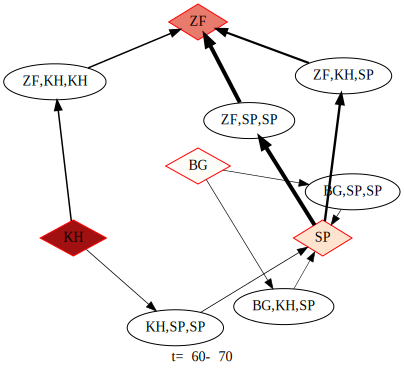

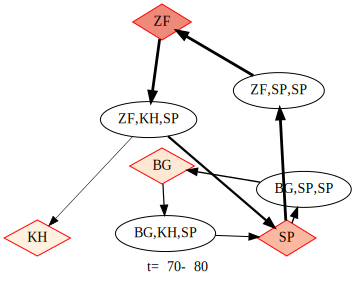

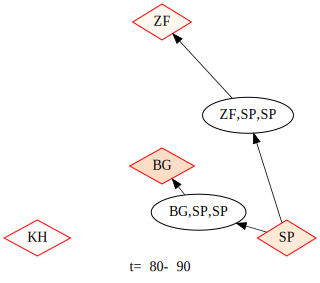

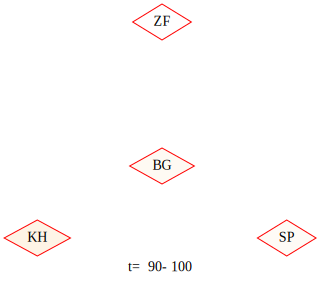

In [21]:
for i in range(j_kpq.shape[3]):
    triadgraph_symmetric_all(j_kpq[:,:,:,i],output="png/symmetric_jkpq_t{0:08d}.png".format(i),title="t={:4d}".format(i),nodename=nodename,energy=energy[:,i])
    triadgraph_symmetric_all(j_kpq[:,:,:,i],output="dot/symmetric_jkpq_t{0:08d}.dot".format(i),title="t={:4d}".format(i),nodename=nodename,energy=energy[:,i])
for i in range(10):
    triadgraph_symmetric_all(np.average(j_kpq[:,:,:,i*10:(i+1)*10],axis=3),title="t={:4d}-{:4d}".format(i*10,(i+1)*10),nodename=nodename,energy=np.average(energy[:,i*10:(i+1)*10],axis=1))

## 7.2 Visualization of directional representation $D_{k \leftarrow q}^p$
We propose the directional representation which looks qualitatively similar to the symmetrized triad transfer.

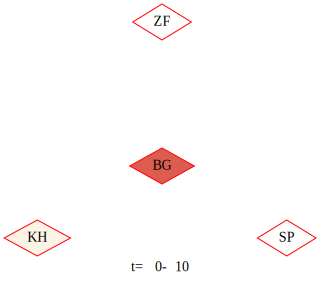

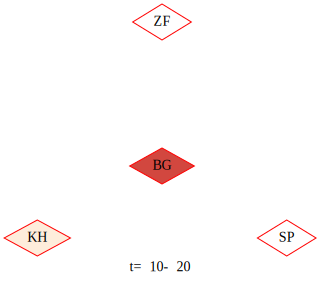

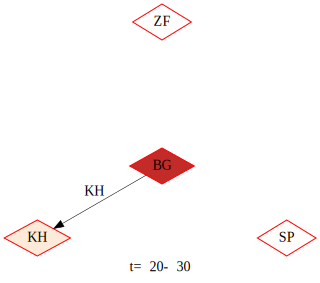

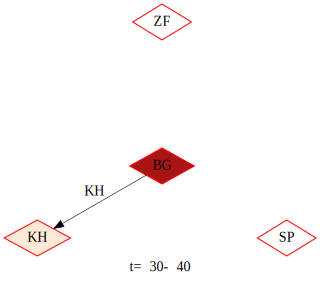

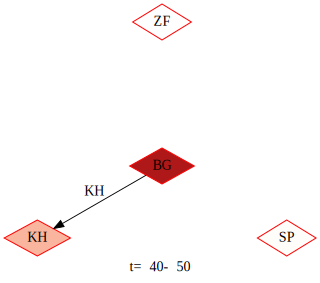

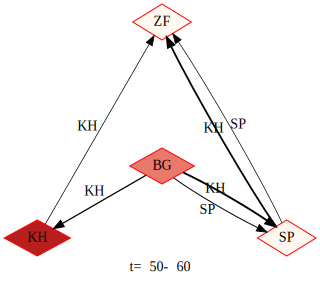

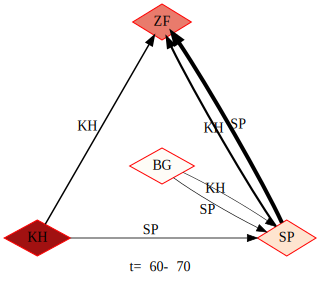

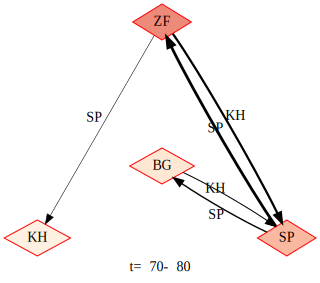

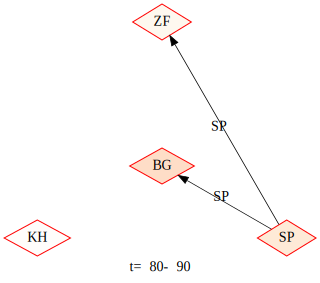

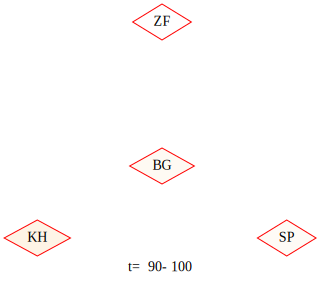

In [22]:
for i in range(d_kpq.shape[3]):
    triadgraph_directional_all(d_kpq[:,:,:,i],output="png/directional_dkpq_t{0:08d}.png".format(i),title="t={:4d}".format(i),nodename=nodename,energy=energy[:,i])
    triadgraph_directional_all(d_kpq[:,:,:,i],output="dot/directional_dkpq_t{0:08d}.dot".format(i),title="t={:4d}".format(i),nodename=nodename,energy=energy[:,i])
for i in range(10):
    triadgraph_directional_all(np.average(d_kpq[:,:,:,i*10:(i+1)*10],axis=3),title="t={:4d}-{:4d}".format(i*10,(i+1)*10),nodename=nodename,energy=np.average(energy[:,i*10:(i+1)*10],axis=1))

## 7.3 Visualization of non-symmetrized triad transfer $A_k^{p,q}$
One may observe fictitious interactions and qualitatively different interpretation from the symmetrized transfer.

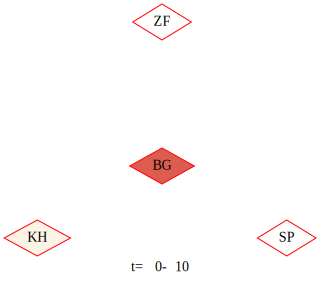

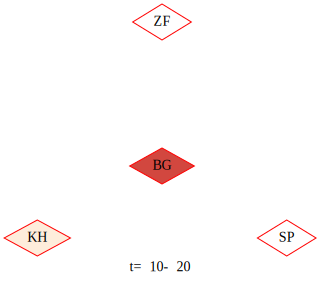

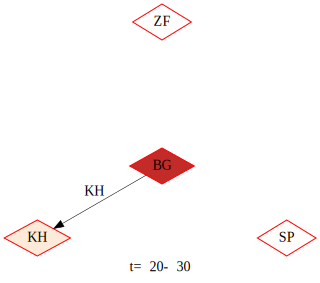

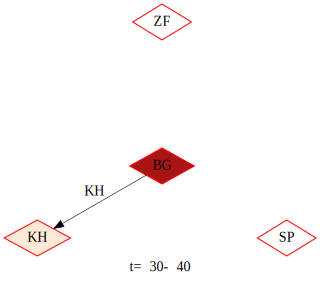

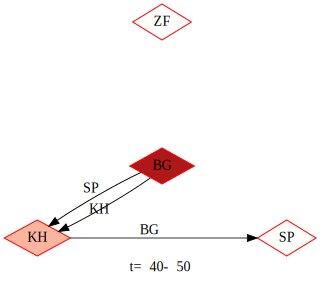

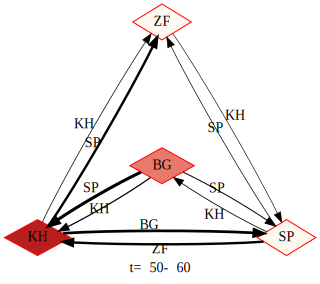

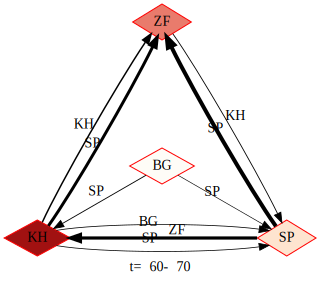

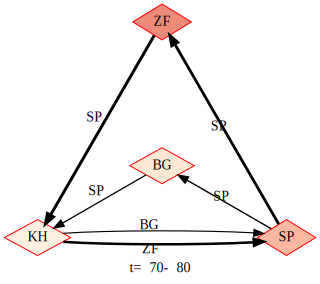

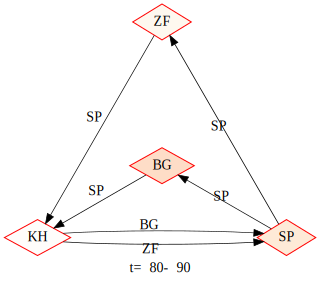

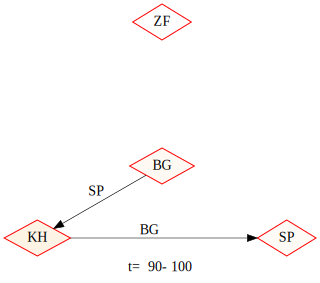

In [23]:
wa_kpq = np.transpose(a_kpq,axes=(0,2,1,3))
for i in range(wa_kpq.shape[3]):
    triadgraph_directional_all(wa_kpq[:,:,:,i],output="png/asymmetric_akpq_t{0:08d}.png".format(i),title="t={:4d}".format(i),nodename=nodename,energy=energy[:,i])
    triadgraph_directional_all(wa_kpq[:,:,:,i],output="dot/asymmetric_akpq_t{0:08d}.dot".format(i),title="t={:4d}".format(i),nodename=nodename,energy=energy[:,i])
for i in range(10):
    triadgraph_directional_all(np.average(wa_kpq[:,:,:,i*10:(i+1)*10],axis=3),title="t={:4d}-{:4d}".format(i*10,(i+1)*10),nodename=nodename,energy=np.average(energy[:,i*10:(i+1)*10],axis=1))